In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animals10/translate.py
/kaggle/input/animals10/raw-img/cavallo/OIP-mdvOxIWAyReAoEJcMk5z4wHaJ4.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-TPYKs3XId_sMgp_6LLA6JgDMEy.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-jlVRrokx7Vu1axi8OnTX2AHaE2.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-F4QVZ71QagiynDMnFNxJUAHaEK.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-UFtUZnXq0JHZo5R8UuF80wHaFj.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-irWuWeIWd3Hm3BWGd0OEsQHaGO.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-Y-hB14A3coI7TEgrEew0UAHaFj.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-KqeKmYfnRwKd89nLg8_zRAHaHb.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-s40xdXSQY099gt1hLGlzAwHaFP.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-4k_sWoJ4_9-G1f0emDBVtwHaE6.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-W-uUxHx-yovp1DQNtX1qdQHaFk.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-Npxx8kemjjTljUyT9-BQgAHaFi.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-jCu7nlv

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np 
import cv2
from pathlib import Path
import pandas as pd
import tensorflow as tf

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')  
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu , True) 

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animals10


In [9]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
sample_image_path = '/kaggle/input/animals10/raw-img/cane/OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg'

In [11]:
os.path.split(os.path.split(sample_image_path)[0])

('/kaggle/input/animals10/raw-img', 'cane')

In [12]:
dataset = '/kaggle/input/animals10'

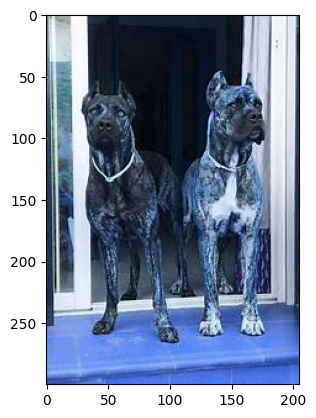

(300, 205, 3)


In [13]:
sample_image = cv2.imread(sample_image_path)
plt.imshow(sample_image)
plt.show()
print(sample_image.shape)

In [14]:
def convert_img_to_df(dataset):

    filepath = list(Path(dataset).glob('**/*.jpg')) + list(Path(dataset).glob('**/*.jpeg')) + list(Path(dataset).glob('**/*.JPG')) + list(Path(dataset).glob('**/*.PNG'))+ list(Path(dataset).glob('**/*.png')) + list(Path(dataset).glob('**/*.JPEG'))

    labels = list(map( lambda x : os.path.split(os.path.split(x)[0])[1] , filepath))
    
    filepath = pd.Series(filepath , name = 'filepath').astype(str)
    labels = pd.Series(labels , name = 'label')

    df = pd.concat([filepath , labels] , axis = 1)

    return df
    

In [15]:
df = convert_img_to_df(dataset)
df

,filepath,label
0,/kaggle/input/animals10/raw-img/pecora/eb31b90...,pecora
1,/kaggle/input/animals10/raw-img/pecora/eb36b80...,pecora
2,/kaggle/input/animals10/raw-img/pecora/ea37b10...,pecora
3,/kaggle/input/animals10/raw-img/pecora/eb3db10...,pecora
4,/kaggle/input/animals10/raw-img/pecora/ea36b70...,pecora
...,...,...
26174,/kaggle/input/animals10/raw-img/farfalla/eb32b...,farfalla
26175,/kaggle/input/animals10/raw-img/farfalla/ea36b...,farfalla
26176,/kaggle/input/animals10/raw-img/farfalla/eb32b...,farfalla
26177,/kaggle/input/animals10/raw-img/farfalla/eb32b...,farfalla


In [21]:
from PIL import UnidentifiedImageError

In [18]:
path = Path(dataset).glob('**/*.jpeg')

for img_path in path :
    try:
        img = Image.open(f'{img_path}')
        
    except PIL.UnidentifiedImageError :
        print(img_path)

In [47]:

# ✅ Cell 1: Imports & Setup
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import warnings
warnings.filterwarnings('ignore')

In [48]:
# ✅ Cell 2: Load Dataset
base_path = "/kaggle/input/animals10/raw-img"
def convert_img_to_df(dataset):
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']
    files = []
    for ext in extensions:
        files.extend(Path(dataset).rglob(ext))

    cleaned_files = []
    labels = []
    for f in files:
        try:
            img = Image.open(f)
            img.verify()
            cleaned_files.append(str(f))
            labels.append(os.path.basename(os.path.dirname(f)))
        except (UnidentifiedImageError, OSError):
            continue

    df = pd.DataFrame({'filepath': cleaned_files, 'label': labels})
    return df

df = convert_img_to_df(base_path)
print("Total samples:", len(df))
print(df['label'].value_counts())

Total samples: 26179
label
cane          4863
ragno         4821
gallina       3098
cavallo       2623
farfalla      2112
mucca         1866
scoiattolo    1862
pecora        1820
gatto         1668
elefante      1446
Name: count, dtype: int64


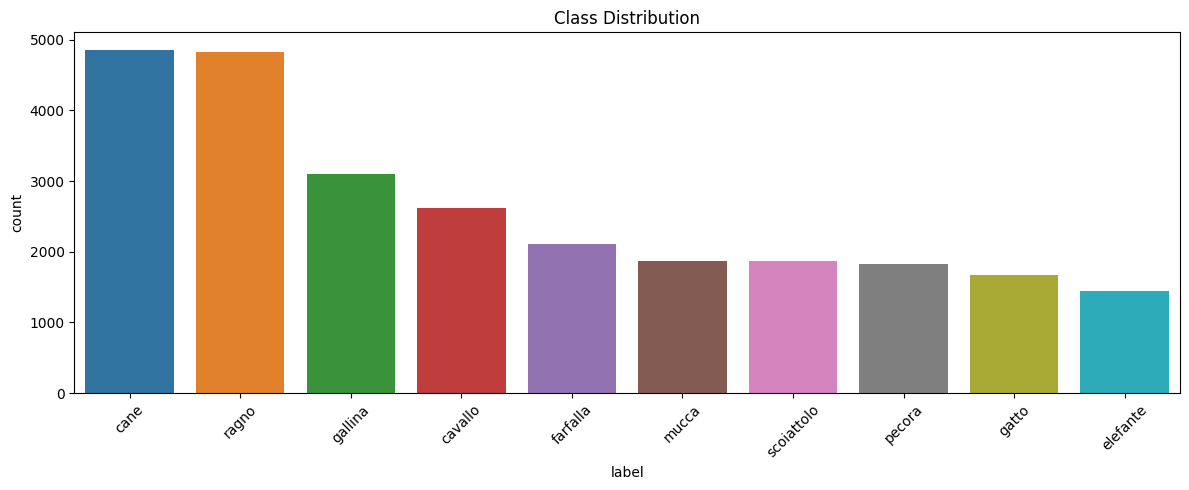

In [49]:
# ✅ Cell 3: Plot Class Distribution
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()


In [50]:
# ✅ Cell 4: Load and Preprocess Images
def load_images(df, image_size=(64, 64)):
    X, y = [], []
    for _, row in df.iterrows():
        img = cv2.imread(row['filepath'])
        if img is not None:
            img = cv2.resize(img, image_size)
            X.append(img)
            y.append(row['label'])
    return np.array(X), np.array(y)

X, y = load_images(df)
le = LabelEncoder()
y_encoded = le.fit_transform(y)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [51]:
# ✅ Cell 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [52]:
# ✅ Cell 6: Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

In [53]:
# ✅ Cell 7: CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.1)

cnn_preds = np.argmax(cnn_model.predict(X_test), axis=1)


Epoch 1/2
295/295 ━━━━━━━━━━━━━━━━━━━━ 50s 164ms/step - accuracy: 0.2490 - loss: 2.1068 - val_accuracy: 0.4348 - val_loss: 1.6815
Epoch 2/2
295/295 ━━━━━━━━━━━━━━━━━━━━ 48s 163ms/step - accuracy: 0.4104 - loss: 1.6970 - val_accuracy: 0.5136 - val_loss: 1.4428
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


In [54]:
# ✅ Cell 8: Evaluation Function
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n{name} Results")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("F1 Score:", f1)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    return name, acc, prec, f1



CNN Results
Accuracy: 0.5013368983957219
Precision: 0.4796888554308899
F1 Score: 0.414192308611833


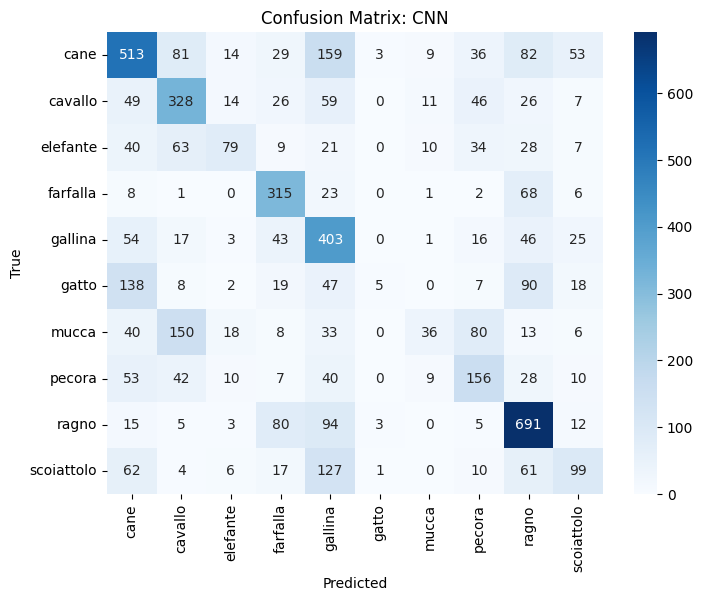

In [43]:
# ✅ Cell 9: Evaluate CNN
results = []
results.append(evaluate_model("CNN", y_test, cnn_preds))


Training Logistic Regression...

Logistic Regression Results
Accuracy: 0.2767379679144385
Precision: 0.257236705107654
F1 Score: 0.2539241924334733


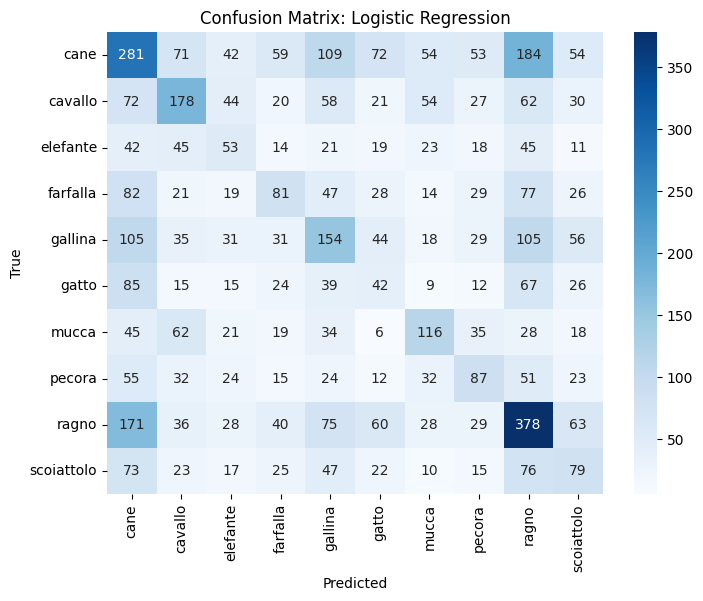


Training Decision Tree...

Decision Tree Results
Accuracy: 0.25763941940412527
Precision: 0.2341084357559698
F1 Score: 0.23324111292737362


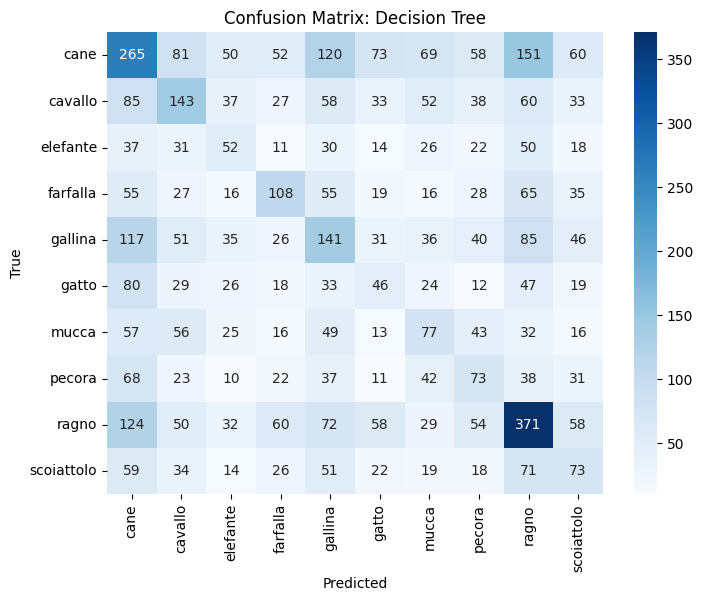


Training Random Forest...

Random Forest Results
Accuracy: 0.4043162719633308
Precision: 0.5359772753648848
F1 Score: 0.33686754900727744


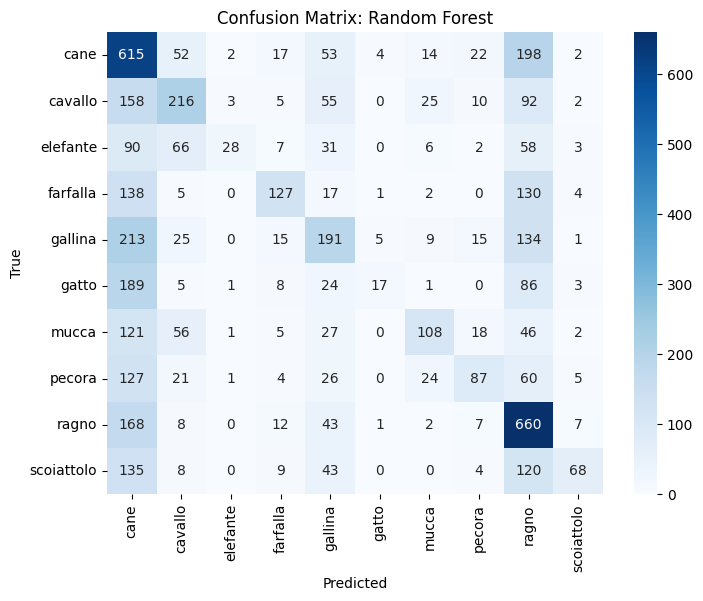


Training Gradient Boosting...


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_flat, y_train)
    preds = model.predict(X_test_flat)
    results.append(evaluate_model(name, y_test, preds))

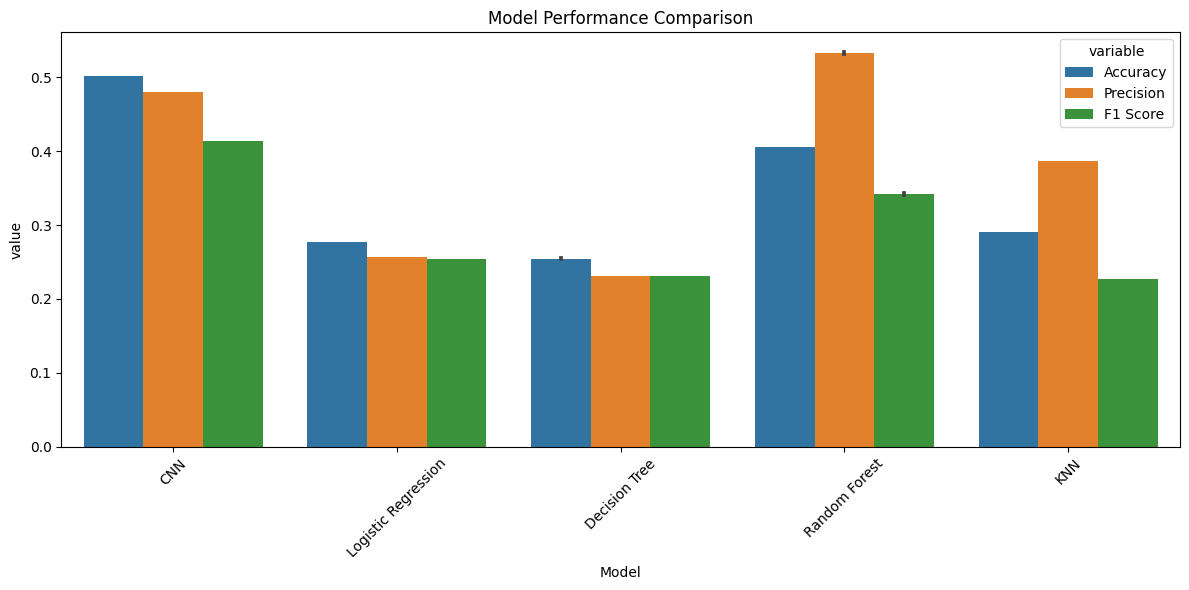

                 Model  Accuracy  Precision  F1 Score
0                  CNN  0.501337   0.479689  0.414192
1  Logistic Regression  0.276738   0.257237  0.253924
2        Decision Tree  0.253820   0.231464  0.230989
3        Random Forest  0.406035   0.534012  0.343935
4                  KNN  0.290871   0.386179  0.227343
5  Logistic Regression  0.276738   0.257237  0.253924
6        Decision Tree  0.254966   0.231541  0.231417
7        Random Forest  0.405844   0.531008  0.340079
8                  KNN  0.290871   0.386179  0.227343


In [56]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "F1 Score"])
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(results_df)